In [1]:
import pandas as pd 

In [2]:
dfq = pd.read_csv('divorce.csv', delimiter=';')
dfr = pd.read_csv('reference.tsv', delimiter='|')

In [3]:
dfq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [4]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   atribute_id  54 non-null     int64 
 1   description  54 non-null     object
dtypes: int64(1), object(1)
memory usage: 992.0+ bytes


In [5]:
dfq

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [19]:
dfq.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [20]:
dfr.head()

,atribute_id,description
0,1,If one of us apologizes when our discussion de...
1,2,"I know we can ignore our differences, even if ..."
2,3,"When we need it, we can take our discussions w..."
3,4,"When I discuss with my spouse, to contact him ..."
4,5,The time I spent with my wife is special for us.


In [21]:
data_features = dfq.drop('Divorce', axis=1)
data_features.rename(columns=lambda x: x.replace('Q',""), inplace=True)
data_features.columns = [int(i) for i in data_features.columns]

In [22]:
positive = []
negative = []
for i in list(dfq.index):
    if (dfq['Divorce'][i] == 0):
        positive.append(i)
    else:
        negative.append(i)

In [23]:
data_features_positive = data_features.drop(positive, axis=0)
data_features_negative = data_features.drop(negative, axis=0)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data_features_all = pd.DataFrame(columns=[], index=[])

j = 1
for i in range(1,55,1):
    data_features_all[j] = data_features[i]
    j+=1
    data_features_all[j] = data_features_positive[i]
    j+=1
    data_features_all[j] = data_features_negative[i]
    j+=1

C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features_positive[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features_negative[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features_positive[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features_positive[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_features_all[j] = data_features_negative[i]
C:\Users\dell\AppData\Local\Temp\ipykernel_9552\304266772.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

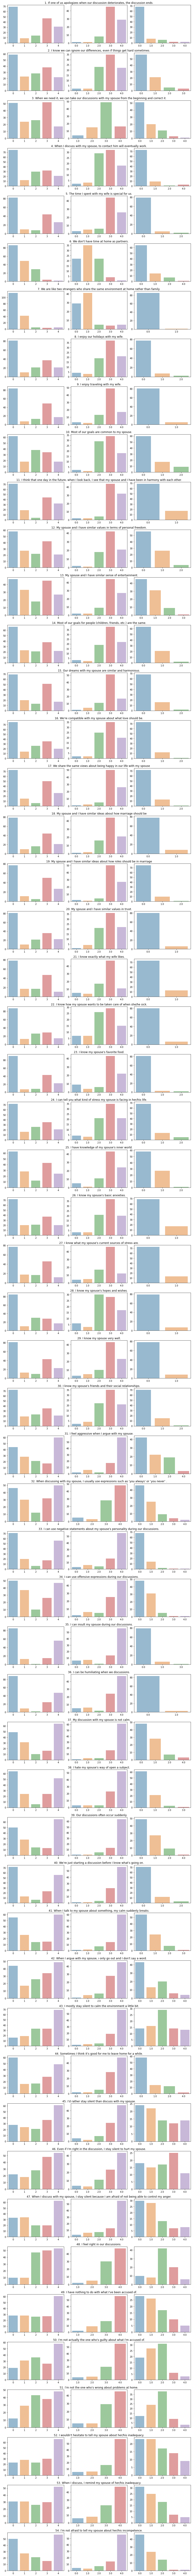

In [26]:
fig, axes = plt.subplots(nrows = round(len(data_features_all.columns) / 3), ncols = 3, figsize=(12,160))
d = 0
c = 0
for i, ax in enumerate(fig.axes):
    if i < len(data_features_all.columns):
        
        if i == 1: 
            ax.set_title("%s"%(d+1) + ". " + dfr['description'][d])
            c = 0
            d+=1
        elif (c % 3 == 0) and (c!=0) and (d <= 53):
            ax.set_title("%s"%(d+1) + ". " + dfr['description'][d])
            d+=1
        c+=1 
        
        sns.countplot(x=data_features_all.columns[i], alpha=0.5, data=data_features_all, ax=ax)
        ax.set_ylabel('')    
        ax.set_xlabel('')

fig.tight_layout()

In [27]:
#fig.savefig('test.png', bbox_inches='tight')

In [8]:
cor = dfq.corr(method='pearson')
cor = cor['Divorce'].sort_values(ascending=False)
cor

Divorce    1.000000
Q40        0.938684
Q17        0.929346
Q19        0.928627
Q18        0.923208
Q11        0.918386
Q9         0.912368
Q20        0.907008
Q15        0.901220
Q39        0.896180
Q41        0.894356
Q5         0.893180
Q29        0.892954
Q36        0.886497
Q16        0.886260
Q38        0.883311
Q30        0.874531
Q26        0.872868
Q27        0.869788
Q8         0.869569
Q12        0.868983
Q21        0.864519
Q14        0.864316
Q37        0.863597
Q35        0.862624
Q33        0.861328
Q1         0.861324
Q25        0.857052
Q44        0.847336
Q28        0.846606
Q13        0.844743
Q24        0.839392
Q23        0.837504
Q34        0.835167
Q10        0.834897
Q32        0.829056
Q22        0.825938
Q2         0.820774
Q4         0.819583
Q54        0.806765
Q3         0.806709
Q31        0.792607
Q50        0.755248
Q49        0.740704
Q42        0.739629
Q53        0.711176
Q51        0.692681
Q47        0.656409
Q52        0.651478
Q48        0.619830


In [11]:
X = dfq.drop('Divorce', axis=1)
y = dfq['Divorce']

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, cohen_kappa_score, confusion_matrix, f1_score
from imblearn.over_sampling import SMOTE
import seaborn as sns

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=0)

In [19]:
svc_model = SVC()
svc_model.fit(X, y)
prediction = svc_model.predict(x_test)

In [20]:
def classification_report(model, x_test, y_test, model_name):
    print(f'----------------{model_name}----------------')
    
    y_pred = model.predict(x_test)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, prediction, average='weighted'))
    print('precision: ', precision_score(y_test, prediction, average='weighted'))
    print('f1-score: ', f1_score(y_test, prediction, average='weighted'))

    cm = confusion_matrix(y_test, prediction)
    
    sns.heatmap(cm, annot=True, cmap='gray')

----------------svm----------------
accuracy:  0.9803921568627451
recall:  0.9803921568627451
precision:  0.981118373275236
f1-score:  0.9803770564829705


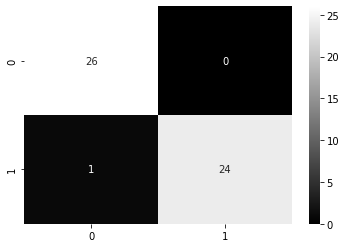

In [21]:
classification_report(svc_model,x_test,y_test,'svm')

In [28]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train, y_train)
print(clf.predict([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))

[0]


C:\Users\dell\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [29]:
def classification_report(model, x_test, y_test, model_name):
    print(f'----------------{model_name}----------------')
    
    y_pred = model.predict(x_test)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, prediction, average='weighted'))
    print('precision: ', precision_score(y_test, prediction, average='weighted'))
    print('f1-score: ', f1_score(y_test, prediction, average='weighted'))

    cm = confusion_matrix(y_test, prediction)
    
    sns.heatmap(cm, annot=True, cmap='YlGnBu')

----------------rf----------------
accuracy:  0.9803921568627451
recall:  0.9803921568627451
precision:  0.981118373275236
f1-score:  0.9803770564829705


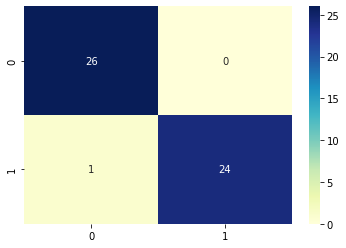

In [30]:
classification_report(svc_model, x_test, y_test,'rf')

In [33]:
GNB = GaussianNB()
GNB.fit(x_train,y_train)

GaussianNB()

In [34]:
def classification_report(model, x_test, y_test, model_name):
    print(f'----------------{model_name}----------------')
    
    y_pred = model.predict(x_test)
    print('accuracy: ', accuracy_score(y_test, y_pred))
    print('recall: ', recall_score(y_test, prediction, average='weighted'))
    print('precision: ', precision_score(y_test, prediction, average='weighted'))
    print('f1-score: ', f1_score(y_test, prediction, average='weighted'))

    cm = confusion_matrix(y_test, prediction)
    
    sns.heatmap(cm, annot=True, cmap='Greens')

----------------GNB----------------
accuracy:  0.9607843137254902
recall:  0.9803921568627451
precision:  0.981118373275236
f1-score:  0.9803770564829705


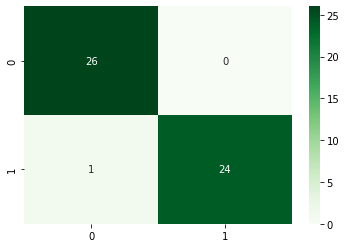

In [35]:
classification_report(GNB, x_test, y_test,'GNB')